In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

In [3]:
hours_studied = np.array([5, 10, 4, 8, 15, 9, 16, 11, 6, 14])
attendance = np.array([70, 80, 60, 75, 90, 85, 95, 88, 72, 92])
final_score = np.array([65, 75, 60, 70, 88, 78, 92, 82, 68, 90])

In [4]:
X = np.column_stack((hours_studied, attendance))
X = sm.add_constant(X)
y = final_score
model = sm.OLS(y, X).fit()

In [5]:
intercept, coef_hours, coef_attendance = model.params

In [6]:
hours_range = np.linspace(min(hours_studied), max(hours_studied), 10)
attendance_range = np.linspace(min(attendance), max(attendance), 10)

In [7]:
H, A = np.meshgrid(hours_range, attendance_range)
Z = intercept + coef_hours * H + coef_attendance * A

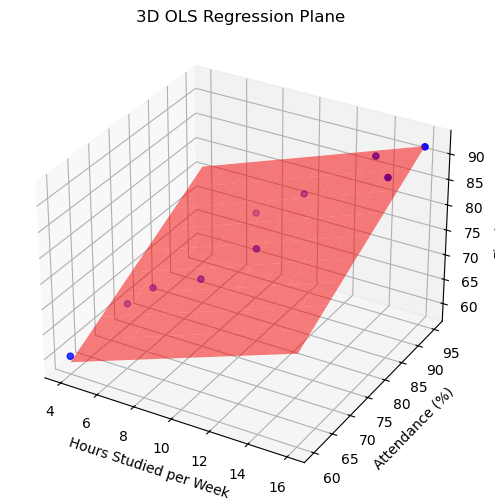

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hours_studied, attendance, final_score, color='blue', label='Actual Data')
ax.plot_surface(H, A, Z, color='red', alpha=0.5)
ax.set_xlabel('Hours Studied per Week')
ax.set_ylabel('Attendance (%)')
ax.set_zlabel('Final Score')
ax.set_title('3D OLS Regression Plane')
plt.show()